In [14]:
# !!pip install -r requiremets.txt

In [39]:
import pandas as pd

interactions = pd.read_csv("dataset/goodreads_interactions.csv")

In [38]:
interactions.describe()

,user_id,book_id,is_read,rating,is_reviewed
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,250795.597690,2.021175e+05,0.487900,1.789090,0.071460
std,172072.275543,3.462288e+05,0.499856,2.068117,0.257593
min,5.000000,7.000000e+00,0.000000,0.000000,0.000000
25%,114367.000000,1.264500e+04,0.000000,0.000000,0.000000
50%,234399.000000,5.041700e+04,0.000000,0.000000,0.000000
75%,359334.000000,2.222632e+05,1.000000,4.000000,0.000000
max,876108.000000,2.360576e+06,1.000000,5.000000,1.000000


In [40]:
interactions = interactions.loc[interactions['rating'] > 0].sample(100000)
interactions.describe()

,user_id,book_id,is_read,rating,is_reviewed
count,100000.000000,1.000000e+05,100000.0,100000.000000,100000.000000
mean,258181.321010,1.891837e+05,1.0,3.941100,0.148000
std,182070.582836,3.580181e+05,0.0,0.989424,0.355102
min,11.000000,1.000000e+01,1.0,1.000000,0.000000
25%,113434.750000,7.491000e+03,1.0,3.000000,0.000000
50%,237917.000000,3.357350e+04,1.0,4.000000,0.000000
75%,371372.000000,1.796590e+05,1.0,5.000000,0.000000
max,876056.000000,2.357616e+06,1.0,5.000000,1.000000


In [41]:
grouped = interactions.groupby('book_id')
grouped.count()

,user_id,is_read,rating,is_reviewed
book_id,,,,
10,4,4,4,4
17,1,1,1,1
19,12,12,12,12
25,9,9,9,9
27,1,1,1,1
...,...,...,...,...
2353764,1,1,1,1
2353982,1,1,1,1
2355585,1,1,1,1


In [42]:
df = interactions.groupby('book_id').filter(lambda x: len(x) >= 2)
df.count()

user_id        58014
book_id        58014
is_read        58014
rating         58014
is_reviewed    58014
dtype: int64

In [31]:
def test(x):
    print(len(x))
    return len(x) >= 10

grouped = interactions.groupby('book_id')
group_sizes = grouped.size()
mask = group_sizes >= 4
grouped = interactions[interactions['book_id'].isin(group_sizes[mask].index)]
grouped.describe()

,user_id,book_id,is_read,rating,is_reviewed
count,14099.000000,14099.000000,14099.0,14099.000000,14099.000000
mean,283624.630399,8827.056954,1.0,4.005674,0.082559
std,201852.095868,11421.896255,0.0,1.003100,0.275224
min,2.000000,25.000000,1.0,1.000000,0.000000
25%,124044.500000,1011.000000,1.0,3.000000,0.000000
50%,257124.000000,6536.000000,1.0,4.000000,0.000000
75%,396785.500000,13429.000000,1.0,5.000000,0.000000
max,876122.000000,157762.000000,1.0,5.000000,1.000000


In [32]:
def test(x):
    print(x)
    return x

grouped.head(1).apply(test)

19229864    37707
Name: user_id, dtype: int64
19229864    22544
Name: book_id, dtype: int64
19229864    1
Name: is_read, dtype: int64
19229864    5
Name: rating, dtype: int64
19229864    0
Name: is_reviewed, dtype: int64


,user_id,book_id,is_read,rating,is_reviewed
19229864,37707,22544,1,5,0


In [33]:
# for group_name, group_df in grouped:
#     print(f"Group: {group_name}")
#     print(group_df[['user_id', 'rating']])
#     print("\n")
#     break

In [34]:
# import networkx as nx
# from multiprocessing import Pool

# G = nx.Graph()
# edges = []

# for group_name, group_df in grouped:
#     print(f"Group: {group_name}")
#     for i in range(0,group_df.shape[0]-1):
#         for j in range(i+1, group_df.shape[0]):
#             edges.append((int(group_df.iloc[i]['user_id']), int(group_df.iloc[j]['user_id'])))

# print(edges[0])
# G.add_edges_from(edges)


In [43]:
import concurrent.futures
import networkx as nx


def process_group(group_name, group_df):
    print(group_name)
    edges = []
    for i in range(group_df.shape[0] - 1):
        for j in range(i + 1, group_df.shape[0]):
            edges.append((int(group_df.iloc[i]['user_id']), int(group_df.iloc[j]['user_id'])))
    return edges


G = nx.Graph()

with concurrent.futures.ThreadPoolExecutor() as executor:
    # Submit each group to the executor
    futures = [executor.submit(process_group, group_name, group_df) for group_name, group_df in grouped]

    # Wait for all tasks to complete
concurrent.futures.wait(futures)

# Collect the results from each group
all_edges = [v for f in futures for v in f.result()]
print(len(all_edges))
G.add_edges_from(all_edges)


10
17
19
25
27
29
30
35
37
39
41
43
49
50
51
55
56
58
63
64
66
68
71
75
76
79
80
82
84
90
92
100
101
104
105
108
109
110
111
113
115
117
119
123
124
125
126
128
129
130
134
135
137
138
141
144
149
150
152
153
154
155
156
157
158
160
165
170
171
172
174
175
176
182
183
186
188
189
192
194
197
200
201
203
204
205
207
209
211
215
216
218
220
223
226
227
229
230
232
233
234
235
236
242
243
245
247
252
254
255
257
258
259
260
261
262
267
269
270
271
272
274
277
279
281
283
288
289
290
294
295
297
298299
301
304
307

313
316
317
320
322
324
325
328
329
331
332
334
337
338
340
341
352
353
361
365
368
369
370
372
374
375
376
380
381
383
384
385
387
394
400
404
406
407
410
412
415
417
419
423
424
425
427
428
430
431
432
433
434
436
438
439
440
441
442
443
444
446
450
451
453
455
456
458
459
460
461
462
463
464
468
471
475
476
479
484
486
488
493
498
499
502
507
512
516
520
522
523
524
525
528
530
531
534
535
536
537
540
542
544
545
547
550
553
555
556
557
561
562
564
565
566
567
569
570
572
575

In [44]:
print(G.number_of_edges())
print(G.number_of_nodes())
print((G.number_of_edges()*2)/G.number_of_nodes())

728092
52319
27.83279496932281


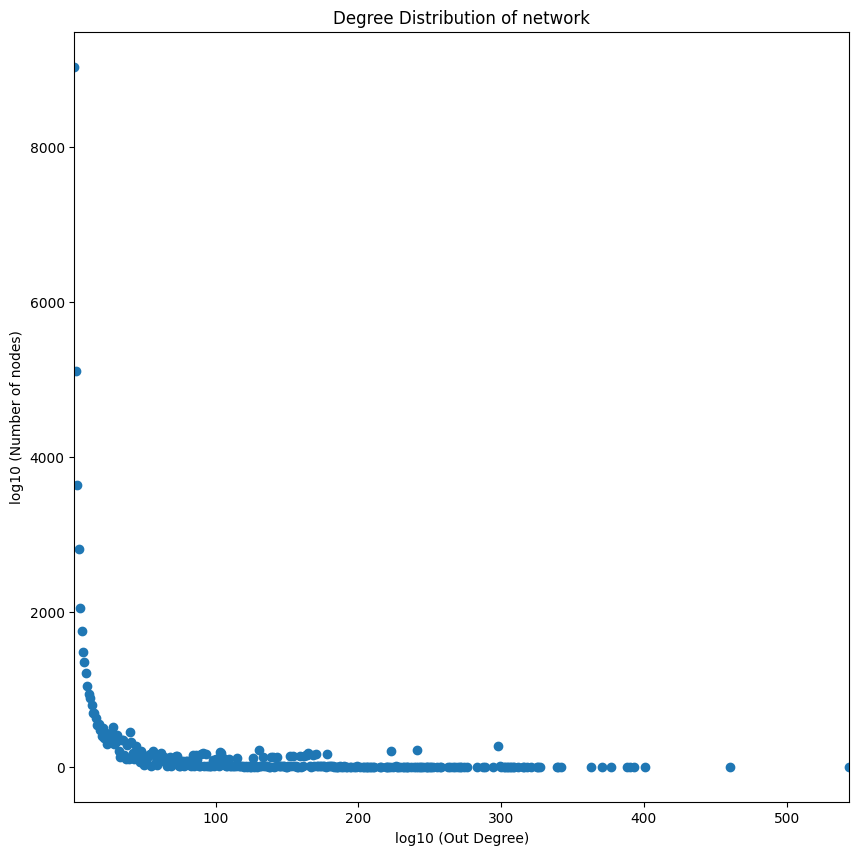

In [45]:
import numpy as np
import matplotlib.pyplot as plt


out_degrees = dict(G.degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]


x = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

plt.figure(figsize=(10,10))
plt.xlim(min(x), max(x))
plt.xlabel('log10 (Out Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Degree Distribution of network')
out_degree_dist = plt.plot(x, y, 'o')